Data Wrangling 
Problem Statement: Data Wrangling on Real Estate Market 
Dataset: "RealEstate_Prices.csv" 
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling. 
Tasks to Perform: 
1.  Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, 
special characters, or renaming them for clarity. 
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., 
imputation or removal). 
3. Perform data merging if additional datasets with relevant information are available 
(e.g., neighborhood demographics or nearby amenities). 
4. Filter and subset the data based on specific criteria, such as a particular time period, 
property type, or location. 
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or 
label encoding) for further analysis. 
6.  Aggregate the data to calculate summary statistics or derived metrics such as average 
sale prices by neighborhood or property type. 
7. Identify and handle outliers or extreme values in the data that may affect the analysis 
or modeling process. 

# 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


# 2 & 3 & 4

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')

In [7]:
def category_size(total_sqft):
    if total_sqft<500:
        return 'small'
    elif total_sqft >= 500 and total_sqft<=1500:
        return 'medium' 
    else:
        return 'Larger'

df['Size_Category']=df['total_sqft'].apply(category_size)

In [8]:
df['price_per_sqft'] = df['price'] / df['total_sqft']

In [9]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
area_type            0
availability         0
location             1
size                16
society           5502
total_sqft         247
bath                73
balcony            609
price                0
Size_Category        0
price_per_sqft     247
dtype: int64


In [10]:
df.drop('society',axis=1,inplace=True)

In [11]:
df['balcony'] = df['balcony'].fillna(1)

In [12]:
df.dropna(inplace=True)

In [13]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column After Cleaning:")
print(missing_values)

Missing Values in Each Column After Cleaning:
area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
Size_Category     0
price_per_sqft    0
dtype: int64


In [14]:
df.shape

(13056, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13056 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13056 non-null  object 
 1   availability    13056 non-null  object 
 2   location        13056 non-null  object 
 3   size            13056 non-null  object 
 4   total_sqft      13056 non-null  float64
 5   bath            13056 non-null  float64
 6   balcony         13056 non-null  float64
 7   price           13056 non-null  float64
 8   Size_Category   13056 non-null  object 
 9   price_per_sqft  13056 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


In [16]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['area_type', 'availability', 'location', 'size', 'Size_Category'], dtype='object')


In [18]:
area_type_filter = df[df['availability'] == 'Ready To Move']
area_type_filter.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,Size_Category,price_per_sqft
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0,Larger,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.0,medium,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.0,Larger,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.0,medium,0.042500
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.0,medium,0.032479


In [19]:
avg_price_by_location = df.groupby('area_type')['price'].mean().reset_index()
print(avg_price_by_location)

              area_type       price
0        Built-up  Area  103.279150
1          Carpet  Area   93.789506
2            Plot  Area  209.714771
3  Super built-up  Area   92.734543


# 5

In [20]:
df1=df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [22]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Size_Category,price_per_sqft
0,3,40,402,13,1056.0,2.0,1.0,39.07,1,0.036998
1,2,79,300,19,2600.0,5.0,3.0,120.00,0,0.046154
2,0,79,1160,16,1440.0,2.0,3.0,62.00,1,0.043056
3,3,79,739,16,1521.0,3.0,1.0,95.00,0,0.062459
4,3,79,698,13,1200.0,2.0,1.0,51.00,1,0.042500
...,...,...,...,...,...,...,...,...,...,...
13315,0,79,1233,22,3453.0,4.0,0.0,231.00,0,0.066898
13316,3,79,985,18,3600.0,5.0,1.0,400.00,0,0.111111
13317,0,79,953,13,1141.0,2.0,1.0,60.00,1,0.052585
13318,3,32,888,18,4689.0,4.0,1.0,488.00,0,0.104073


The Unique Values in each columns:
 area_type            4
availability        80
location          1287
size                31
total_sqft        1894
bath                19
balcony              4
price             1838
Size_Category        3
price_per_sqft    7425
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22128\525789584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')


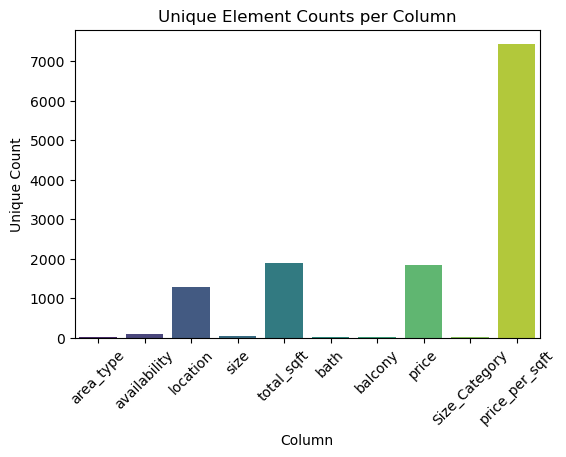

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


unique_counts = df.nunique()
print("The Unique Values in each columns:\n",unique_counts)


plt.figure(figsize=(6, 4))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')

plt.title('Unique Element Counts per Column')
plt.xlabel('Column')
plt.ylabel('Unique Count')

plt.xticks(rotation=45)
plt.show()

In [24]:
df.groupby('area_type')['price'].max()

area_type
0    2050.0
1     500.0
2    3600.0
3    2912.0
Name: price, dtype: float64

In [25]:
df1.groupby('size')['price'].max()

size
1 BHK          750.0
1 Bedroom      306.0
1 RK            52.0
10 BHK         525.0
10 Bedroom    3600.0
11 BHK         360.0
11 Bedroom     170.0
12 Bedroom     300.0
13 BHK         275.0
14 BHK         125.0
16 BHK         550.0
18 Bedroom     200.0
19 BHK         490.0
2 BHK          475.0
2 Bedroom      650.0
27 BHK         230.0
3 BHK         1015.0
3 Bedroom     2000.0
4 BHK         2912.0
4 Bedroom     2600.0
43 Bedroom     660.0
5 BHK         2700.0
5 Bedroom     2736.0
6 BHK         1000.0
6 Bedroom     2800.0
7 BHK         2200.0
7 Bedroom      972.0
8 BHK          310.0
8 Bedroom     1900.0
9 BHK          500.0
9 Bedroom     1200.0
Name: price, dtype: float64

In [26]:
df1.groupby('location')['price'].max()

location
1 Annasandrapalya                                  150.00
1 Giri Nagar                                       360.00
1 Immadihalli                                      150.00
1 Ramamurthy Nagar                                 170.00
12th cross srinivas nagar banshankari 3rd stage    200.00
                                                    ...  
t.c palya                                          160.00
tc.palya                                            78.00
vinayakanagar                                      200.00
white field,kadugodi                               275.00
whitefiled                                          32.73
Name: price, Length: 1287, dtype: float64

# 6

<Axes: ylabel='price'>

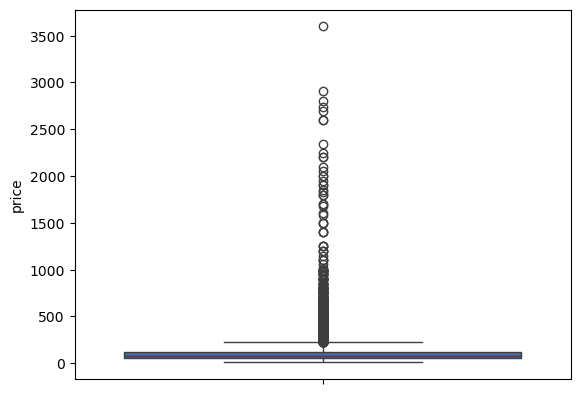

In [27]:
sns.boxplot(df['price'])

In [28]:
outl=np.where(df['price']>1000)
outl

(array([  399,   592,   725,  1264,  1276,  1823,  2231,  2560,  3092,
         3107,  4074,  4831,  4865,  5597,  6065,  6070,  6287,  6634,
         6690,  6929,  7160,  7562,  7687,  7715,  7991,  8218,  8364,
         8409,  8499,  8988,  9150,  9239,  9333,  9344,  9396, 10095,
        10218, 10272, 10854, 11523, 12192, 12728, 12806, 12936, 12939],
       dtype=int64),)

In [29]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: ylabel='price'>

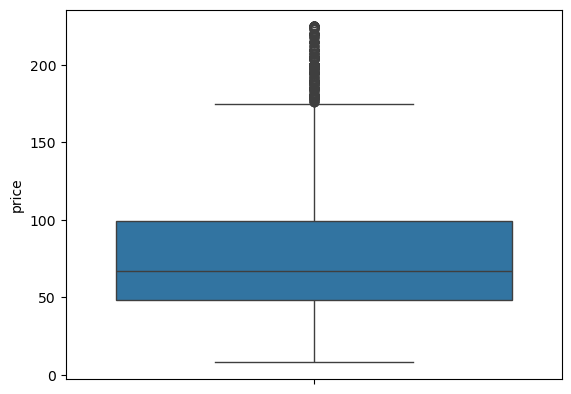

In [30]:
sns.boxplot(df_cleaned['price'])

In [31]:
summary_by_location = df.groupby('location')['price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

summary_by_area_type = df.groupby('area_type')['price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()


In [32]:
summary_by_location

,location,mean,median,std,min,max
0,0,150.00,150.00,NaN,150.00,150.00
1,1,360.00,360.00,NaN,360.00,360.00
2,2,150.00,150.00,NaN,150.00,150.00
3,3,170.00,170.00,NaN,170.00,170.00
4,4,200.00,200.00,NaN,200.00,200.00
...,...,...,...,...,...,...
1282,1282,160.00,160.00,NaN,160.00,160.00
1283,1283,60.75,58.50,12.841988,48.00,78.00
1284,1284,200.00,200.00,NaN,200.00,200.00
1285,1285,275.00,275.00,NaN,275.00,275.00


In [33]:
summary_by_area_type

,area_type,mean,median,std,min,max
0,0,103.279150,70.0,108.852120,9.0,2050.0
1,1,93.789506,75.0,74.297451,13.0,500.0
2,2,209.714771,140.0,254.691937,10.5,3600.0
3,3,92.734543,65.0,114.302760,8.0,2912.0


In [34]:
# def remove_outliers_iqr(df, columns):
#     for col in columns:
#         df[col] = pd.to_numeric(df[col], errors='coerce')
        
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

In [35]:
# df1=remove_outliers_iqr(df,cols)